<a href="https://colab.research.google.com/github/jameswu811102/Deep_Learning_Notes/blob/main/002_%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92_%E5%8D%B7%E7%A9%8D%E7%B6%B2%E8%B7%AF_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)

# 注意，這邊跟MNIST不太一樣，一張圖有多種東西，每種東西都要單獨判斷，每列都是獨立的東西 (會變成表格)  =>  [東西1, 東西2, ...]
# 只有單一數字(MNIST)，就是一維，一個Series
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
names = [
         "airplane",										
         "automobile",										
         "bird",						
         "cat",									
         "deer",										
         "dog",									
         "frog",										
         "horse",										
         "ship",									
         "truck"
]

圖片的標準分類為: [3] cat


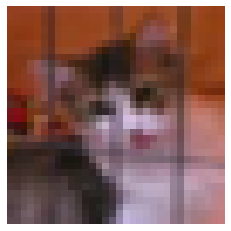

In [ ]:
import matplotlib.pyplot as plt
import random

plt.axis("off")

idx = random.randint(0, 49999)
ans = y_train[idx][0]

print("圖片的標準分類為:", y_train[idx], names[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
# https://keras.io/zh/layers/convolutional/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D  # (組合去掉通道數的維度  =>  H 、 W  =>  兩個維度 所以2D)
from tensorflow.keras.layers import Dense, Flatten, Dropout

layers = [
          #　param 3 * 3 * 3 (一個filter) * 64 (幾個filter) + 64 (一個filter就配一個激活函式) = 1792
          Conv2D(filters=64, kernel_size=3, activation="relu", padding="same", input_shape=(32, 32, 3)),
          MaxPooling2D(),
          # param 3 * 3 * 64 * 128 + 128 = 73856
          Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
          MaxPooling2D(),
          Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
          MaxPooling2D(),

          # 完整評估後，多加一層試試 Conv2D 試試看
          Conv2D(filters=512, kernel_size=3, activation="relu", padding="same"),
          MaxPooling2D(),

          Flatten(),
          
          #　原本128，在完整評估後，回來調成64試試看
          Dense(units=64, activation="relu"),
          Dropout(0.25),
          Dense(units=10, activation="softmax")
]

model = Sequential(layers)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
# 參數算法要會算

# Compile模型

In [ ]:
# sparse categorical  =>  節省RAM
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics="accuracy"
)

# 資料預處理

In [ ]:
# y_train 跟 y_test由於在compile的時候有使用 sparse_categorical ，不需要再做One-Hot Encoding

x_train_normal = x_train / 255.0
x_test_normal = x_test / 255.0

x_train_normal

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# 準備訓練

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
             EarlyStopping(patience=5, restore_best_weights=True),
             ModelCheckpoint("CNN.h5", save_best_only=True)
]

model.fit(
    x = x_train_normal,
    y = y_train,
    batch_size = 200,
    epochs = 25,
    verbose = 2,
    callbacks = callbacks,
    validation_split=0.1
)

Epoch 1/25
225/225 - 6s - loss: 1.7794 - accuracy: 0.3353 - val_loss: 1.3400 - val_accuracy: 0.5068
Epoch 2/25
225/225 - 5s - loss: 1.3387 - accuracy: 0.5184 - val_loss: 1.1303 - val_accuracy: 0.5952
Epoch 3/25
225/225 - 5s - loss: 1.1297 - accuracy: 0.6019 - val_loss: 1.0295 - val_accuracy: 0.6348
Epoch 4/25
225/225 - 5s - loss: 0.9737 - accuracy: 0.6571 - val_loss: 0.8635 - val_accuracy: 0.6986
Epoch 5/25
225/225 - 5s - loss: 0.8506 - accuracy: 0.7056 - val_loss: 0.8238 - val_accuracy: 0.7212
Epoch 6/25
225/225 - 5s - loss: 0.7553 - accuracy: 0.7411 - val_loss: 0.7354 - val_accuracy: 0.7492
Epoch 7/25
225/225 - 5s - loss: 0.6596 - accuracy: 0.7730 - val_loss: 0.7016 - val_accuracy: 0.7664
Epoch 8/25
225/225 - 5s - loss: 0.5644 - accuracy: 0.8069 - val_loss: 0.7077 - val_accuracy: 0.7740
Epoch 9/25
225/225 - 5s - loss: 0.4874 - accuracy: 0.8315 - val_loss: 0.7114 - val_accuracy: 0.7692
Epoch 10/25
225/225 - 5s - loss: 0.4211 - accuracy: 0.8555 - val_loss: 0.7264 - val_accuracy: 0.7734

# 最後用測試資料，做整體測試看看 
* evaluate

In [ ]:
# 測試完後，可以再回去微調模型的參數
model.evaluate(
    x = x_test_normal,
    y = y_test
)

313/313 [==============================] - 1s 4ms/step - loss: 0.7305 - accuracy: 0.7546


[0.7305256128311157, 0.7545999884605408]

# 混淆矩陣

In [ ]:
# 要先處理y_test的問題
print(y_test.shape)

(10000, 1)


In [ ]:
# -1表示電腦會自動幫你計算
y_test_re = y_test.reshape(-1)
y_test_re.shape

(10000,)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

pre = model.predict_classes(x_test_normal)

matrix = confusion_matrix(y_test_re, pre)

pd.DataFrame(
    matrix,
    columns = ["預測是{}".format(names[i]) for i in range(10)],
    index = ["實際是{}".format(names[i]) for i in range(10)]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,預測是airplane,預測是automobile,預測是bird,預測是cat,預測是deer,預測是dog,預測是frog,預測是horse,預測是ship,預測是truck
實際是airplane,717,18,57,17,31,5,11,10,94,40
實際是automobile,6,886,4,6,0,3,6,0,15,74
實際是bird,45,6,615,63,103,69,60,19,10,10
實際是cat,8,13,54,515,70,217,76,23,9,15
實際是deer,10,2,50,43,768,33,33,48,11,2
實際是dog,1,4,35,143,55,701,17,31,3,10
實際是frog,4,5,32,43,41,17,847,3,3,5
實際是horse,6,4,31,22,78,81,3,765,1,9
實際是ship,20,26,15,16,11,7,6,2,872,25
實際是truck,17,56,5,15,4,5,5,11,22,860


# 將猜錯的圖印出來看看

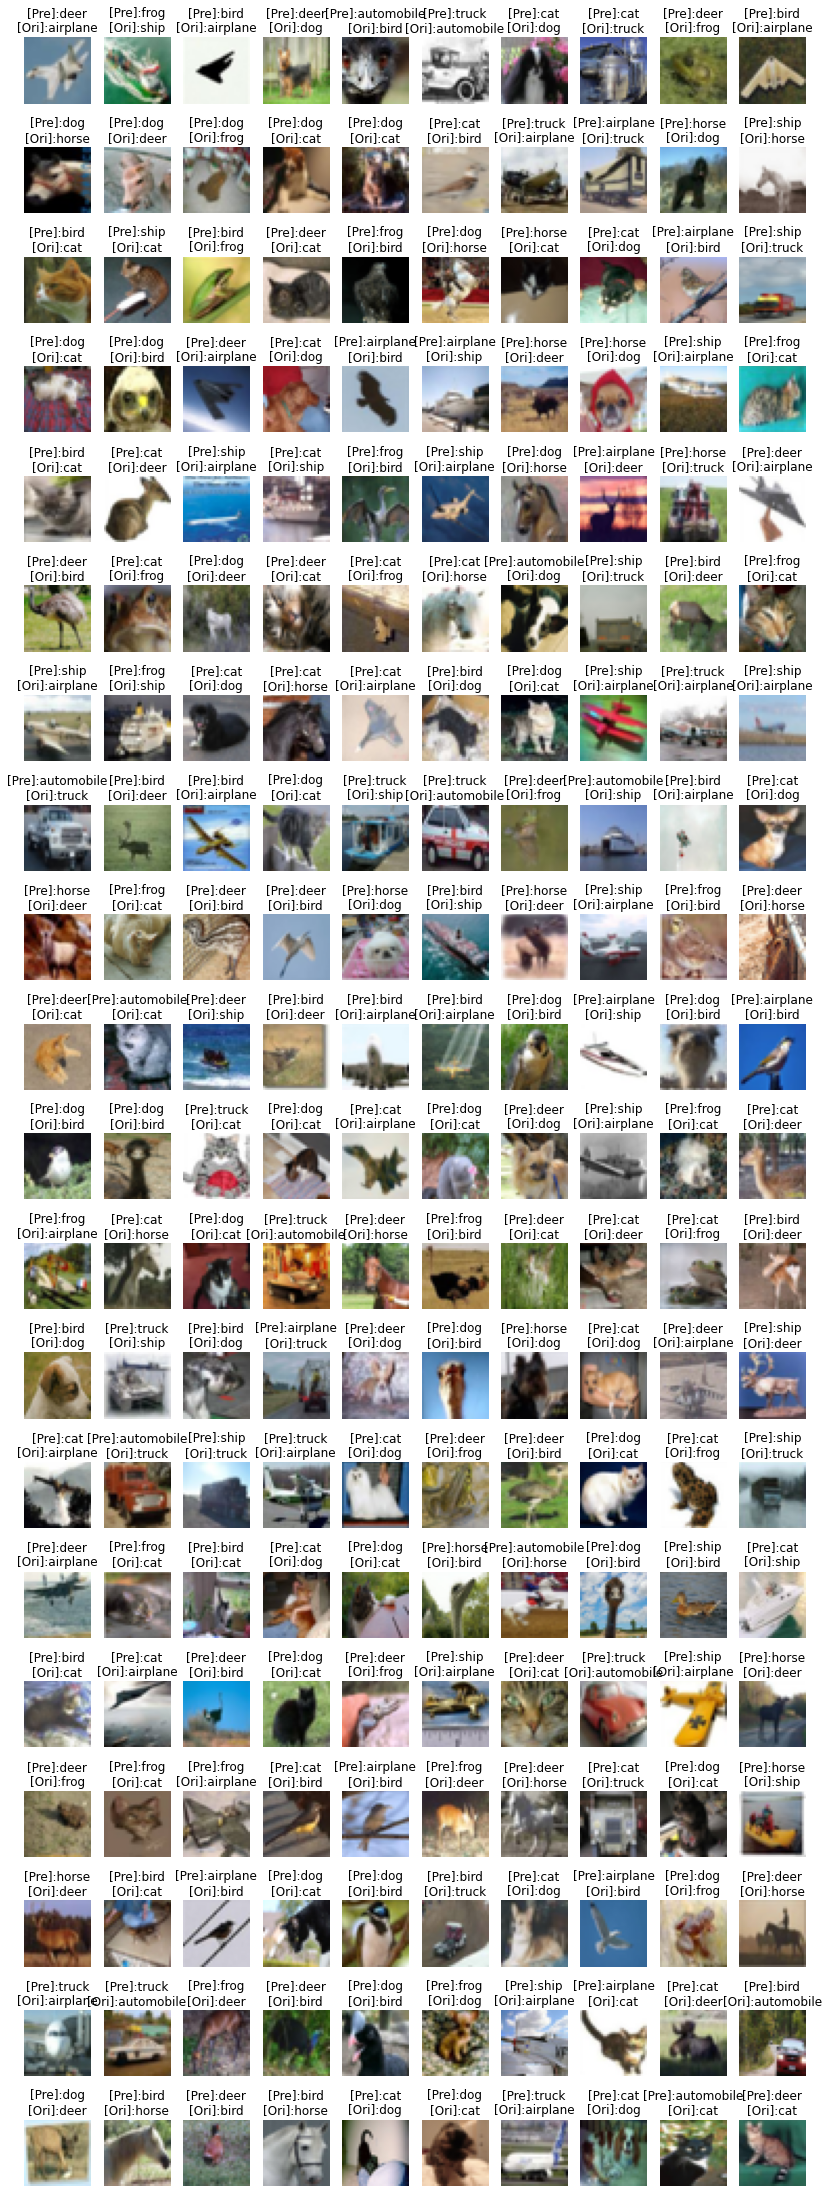

In [ ]:
# plt.subplot(總高，總寬，第幾張)
import numpy as np


# 預測與實際答案不相符的index 
pre_idx = np.nonzero(pre != y_test_re)[0]



""" 這次量比較大，印出前200筆看看就好 """
pre_idx = pre_idx[:200]



# 預測的答案 (預測錯誤的值)
pre_false = pre[pre_idx]

# 查看實際答案 (預測錯誤的正確值)
ans_label = y_test_re[pre_idx]

# 查看測試資料的圖片 (猜錯的圖片)
pre_image = x_test[pre_idx]


# 畫圖看看
plt.figure(figsize=(14, 42))

width = 10
height = len(pre_idx) // width + 1

for i in range(len(pre_image)):
  plt.subplot(height, width, i+1)
  title = "[Pre]:{}\n[Ori]:{}".format(names[pre_false[i]], names[ans_label[i]])
  plt.title(title)
  plt.axis("off")
  plt.imshow(pre_image[i])


---------------------------------------------------

---------------------------------------------------

# 補充：若想看特徵圖的Image

AI的熱區圖示

請搜尋 Attention 視覺化 CNN


# 補充：Colab GPU會過載嗎？
- 注意有時候輸出答案是否若做 One-Hot Encoding 會使記憶體用量Crash